<a href="https://colab.research.google.com/github/Peter2020-tech/Laravel/blob/main/ANN_Trilereyer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files

uploaded = files.upload()

Saving aircraft-dataset.csv to aircraft-dataset.csv


In [4]:
import pandas as pd
import io


file_name = 'aircraft-dataset.csv'
df = pd.read_csv(io.StringIO(uploaded[file_name].decode('utf-8')))


pd.set_option('display.max_rows', 4000)


pd.set_option('display.max_columns', None)


print(df)


       time  operational setting 1  operational setting 2  \
0         1                10.0047                 0.2501   
1         2                 0.0015                 0.0003   
2         3                34.9986                 0.8401   
3         4                20.0031                 0.7005   
4         5                42.0041                 0.8405   
...     ...                    ...                    ...   
45913   129                42.0066                 0.8400   
45914   130                42.0029                 0.8415   
45915   131                41.9999                 0.8400   
45916   132                35.0007                 0.8419   
45917   133                25.0071                 0.6216   

       operational setting 3  sensor measurement 1  sensor measurement 2  \
0                         20                489.05                604.13   
1                        100                518.67                642.13   
2                         60           

Saving aircraft-dataset.csv to aircraft-dataset (2).csv
Files uploaded:  ['aircraft-dataset (2).csv']


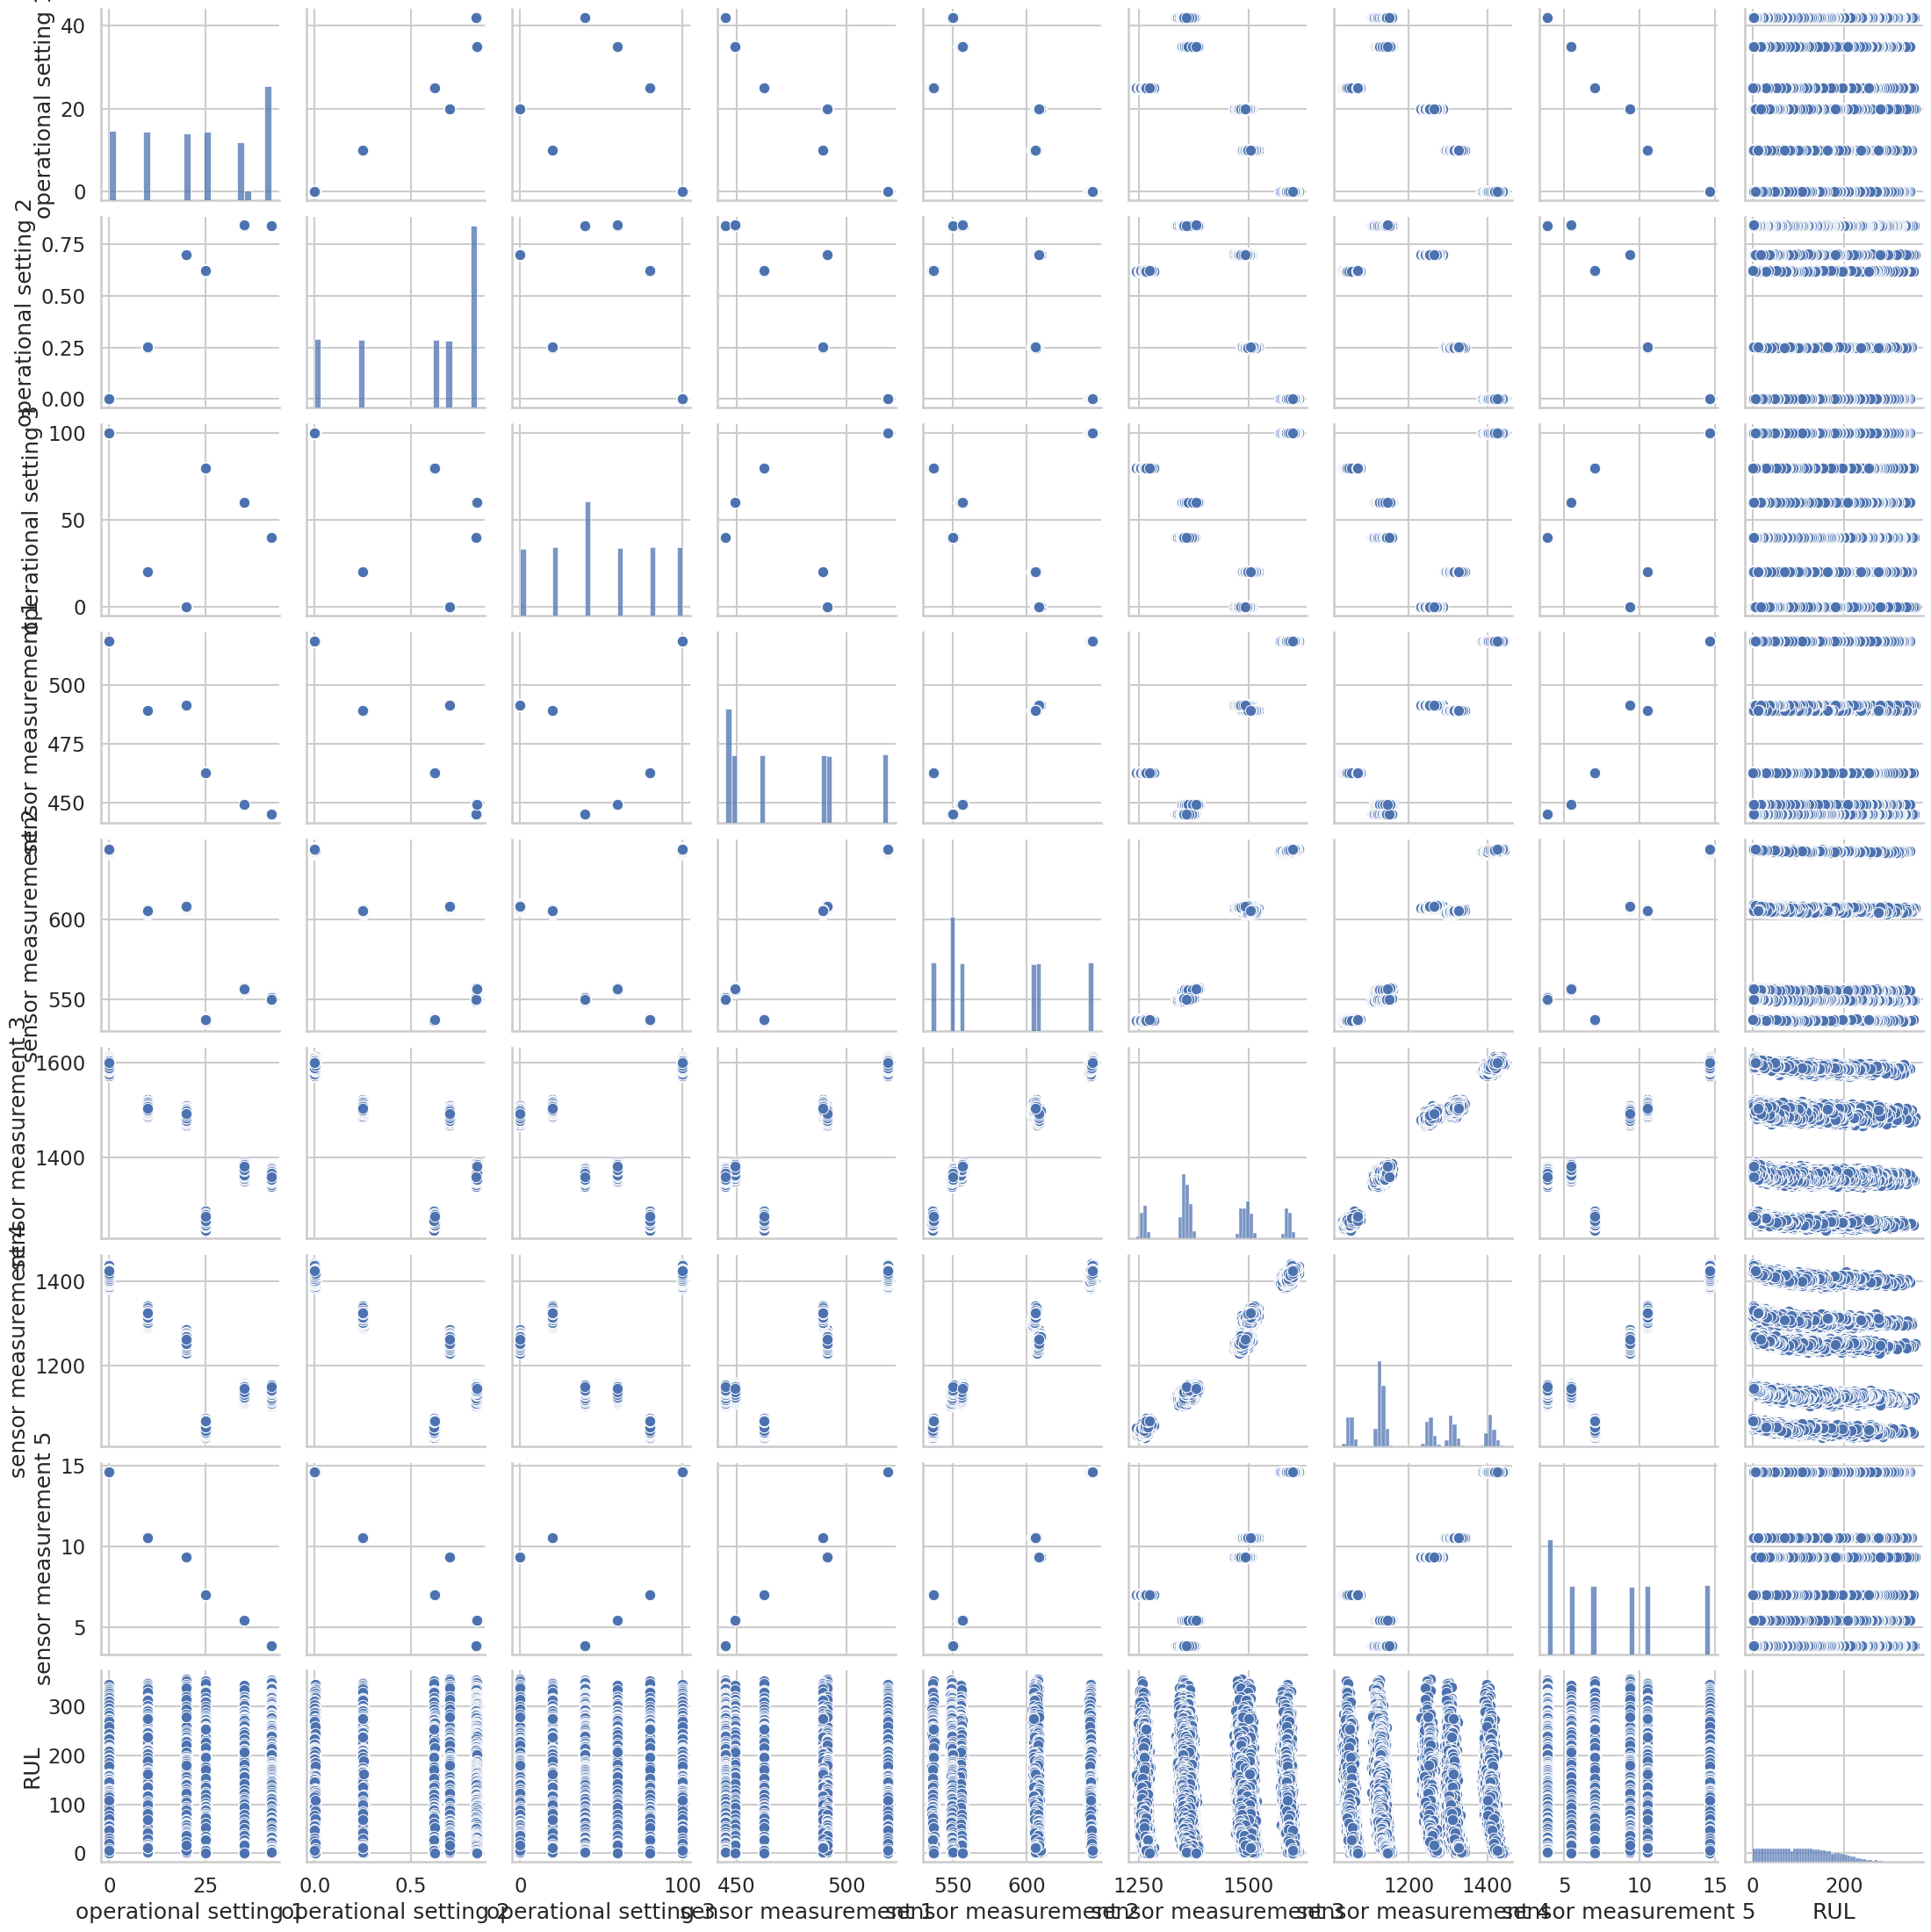

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import io
from google.colab import files


uploaded = files.upload()


print("Files uploaded: ", list(uploaded.keys()))


file_name = list(uploaded.keys())[0]


df = pd.read_csv(io.StringIO(uploaded[file_name].decode('utf-8')))


sns.set(style='whitegrid', context='talk')


columns_to_include = [
    'operational setting 1', 'operational setting 2', 'operational setting 3',
    'sensor measurement 1', 'sensor measurement 2', 'sensor measurement 3',
    'sensor measurement 4', 'sensor measurement 5', 'RUL'
]


sns.pairplot(df[columns_to_include])

# Show the plot
plt.show()


Saving aircraft-dataset.csv to aircraft-dataset (3).csv
Epoch 1/20
1148/1148 [==============================] - 3s 2ms/step - loss: 5299.8550 - mae: 59.2596 - val_loss: 4086.6978 - val_mae: 53.6057
Epoch 2/20
1148/1148 [==============================] - 2s 2ms/step - loss: 3567.6216 - mae: 49.3614 - val_loss: 3016.7405 - val_mae: 45.1365
Epoch 3/20
1148/1148 [==============================] - 3s 3ms/step - loss: 2395.5916 - mae: 38.7211 - val_loss: 1951.2195 - val_mae: 34.0802
Epoch 4/20
1148/1148 [==============================] - 4s 3ms/step - loss: 1913.7174 - mae: 33.2885 - val_loss: 1868.8066 - val_mae: 32.9452
Epoch 5/20
1148/1148 [==============================] - 2s 2ms/step - loss: 1877.7507 - mae: 32.6856 - val_loss: 1841.2010 - val_mae: 32.6438
Epoch 6/20
1148/1148 [==============================] - 3s 2ms/step - loss: 1867.5908 - mae: 32.5211 - val_loss: 1843.4783 - val_mae: 32.6636
Epoch 7/20
1148/1148 [==============================] - 3s 2ms/step - loss: 1863.5712 - mae:

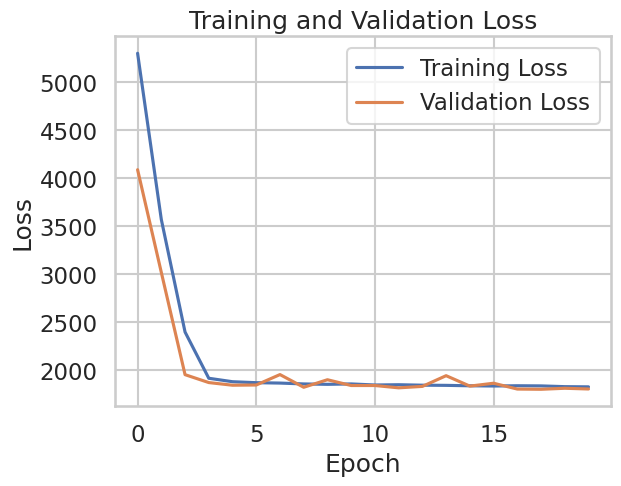

In [7]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Load the dataset
import io
from google.colab import files

uploaded = files.upload()
file_name = list(uploaded.keys())[0]
df = pd.read_csv(io.StringIO(uploaded[file_name].decode('utf-8')))


features = [
    'operational setting 1', 'operational setting 2', 'operational setting 3',
    'sensor measurement 1', 'sensor measurement 2', 'sensor measurement 3',
    'sensor measurement 4', 'sensor measurement 5',
    'sensor measurement 6', 'sensor measurement 7', 'sensor measurement 8',
    'sensor measurement 9', 'sensor measurement 10', 'sensor measurement 11',
    'sensor measurement 12', 'sensor measurement 13', 'sensor measurement 14',
    'sensor measurement 15', 'sensor measurement 16', 'sensor measurement 17',
    'sensor measurement 18', 'sensor measurement 19', 'sensor measurement 20',
    'sensor measurement 21'
]
target = 'RUL'


X = df[features]
y = df[target]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


model = Sequential([
    Dense(64, input_shape=(X_train.shape[1],), activation='relu'),
    Dense(32, activation='relu'),
    Dense(1)
])


model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))


loss, mae = model.evaluate(X_test, y_test)
print(f"Test loss: {loss}, Test MAE: {mae}")


predictions = model.predict(X_test)


print("Sample predictions:")
for i in range(5):
    print(f"Prediction: {predictions[i][0]}, True value: {y_test.iloc[i]}")


plt.figure()
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()


Saving aircraft-dataset.csv to aircraft-dataset (4).csv
Epoch 1/20
1148/1148 [==============================] - 4s 2ms/step - loss: 5545.0991 - mae: 60.4155 - val_loss: 4117.6108 - val_mae: 53.7283
Epoch 2/20
1148/1148 [==============================] - 2s 2ms/step - loss: 3637.3403 - mae: 49.9511 - val_loss: 3187.2029 - val_mae: 46.0299
Epoch 3/20
1148/1148 [==============================] - 3s 3ms/step - loss: 2618.3960 - mae: 40.9858 - val_loss: 2106.8840 - val_mae: 36.1935
Epoch 4/20
1148/1148 [==============================] - 3s 3ms/step - loss: 1972.4044 - mae: 34.0310 - val_loss: 1912.8480 - val_mae: 32.8728
Epoch 5/20
1148/1148 [==============================] - 3s 2ms/step - loss: 1900.8217 - mae: 33.0148 - val_loss: 1927.3905 - val_mae: 33.9681
Epoch 6/20
1148/1148 [==============================] - 3s 2ms/step - loss: 1871.9462 - mae: 32.6581 - val_loss: 1857.8142 - val_mae: 32.9967
Epoch 7/20
1148/1148 [==============================] - 3s 2ms/step - loss: 1864.2838 - mae:

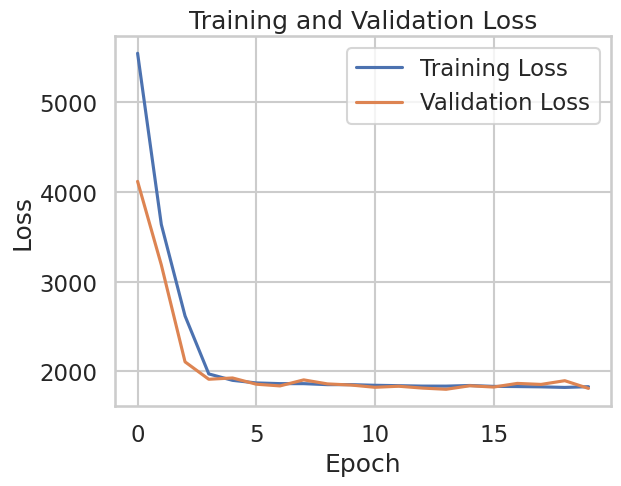

Accuracy: 0.8277439024390244
Precision: 0.7798590823165492


In [8]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error, accuracy_score, precision_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from math import sqrt
import matplotlib.pyplot as plt

# Load the dataset
import io
from google.colab import files

uploaded = files.upload()
file_name = list(uploaded.keys())[0]
df = pd.read_csv(io.StringIO(uploaded[file_name].decode('utf-8')))

# Define the columns to use as features and the target variable
# Adjust this list based on your dataset structure and goals
features = [
    'operational setting 1', 'operational setting 2', 'operational setting 3',
    'sensor measurement 1', 'sensor measurement 2', 'sensor measurement 3',
    'sensor measurement 4', 'sensor measurement 5',
    'sensor measurement 6', 'sensor measurement 7', 'sensor measurement 8',
    'sensor measurement 9', 'sensor measurement 10', 'sensor measurement 11',
    'sensor measurement 12', 'sensor measurement 13', 'sensor measurement 14',
    'sensor measurement 15', 'sensor measurement 16', 'sensor measurement 17',
    'sensor measurement 18', 'sensor measurement 19', 'sensor measurement 20',
    'sensor measurement 21'
]
target = 'RUL'  # Remaining Useful Life

# Separate features and target variable
X = df[features]
y = df[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the feature data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build the neural network model
model = Sequential([
    Dense(64, input_shape=(X_train.shape[1],), activation='relu'),
    Dense(32, activation='relu'),
    Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model
loss, mae = model.evaluate(X_test, y_test)
print(f"Test loss (MSE): {loss}, Test MAE: {mae}")

# Make predictions
y_pred = model.predict(X_test).flatten()

# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
rmse = sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)

# Print evaluation metrics
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared (R2): {r2}")
print(f"Mean Absolute Percentage Error (MAPE): {mape}")

# Plotting training and validation loss over epochs
plt.figure()
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

# Accuracy and Precision are not commonly calculated for regression tasks, but
# here's an example of how you might calculate them for classification tasks
# (using a threshold on predicted values).

# Define a threshold for classification (e.g., classifying remaining useful life as high/low)
threshold = 100

# Convert y_test and y_pred to binary classes based on the threshold
y_test_binary = (y_test > threshold).astype(int)
y_pred_binary = (y_pred > threshold).astype(int)

# Calculate accuracy and precision
accuracy = accuracy_score(y_test_binary, y_pred_binary)
precision = precision_score(y_test_binary, y_pred_binary)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")


Saving aircraft-dataset.csv to aircraft-dataset (5).csv
Epoch 1/20
1148/1148 [==============================] - 4s 2ms/step - loss: 5473.5571 - mae: 60.0831 - val_loss: 4079.4666 - val_mae: 53.3741
Epoch 2/20
1148/1148 [==============================] - 3s 2ms/step - loss: 3585.6501 - mae: 49.5472 - val_loss: 3124.9746 - val_mae: 45.1763
Epoch 3/20
1148/1148 [==============================] - 3s 2ms/step - loss: 2522.4426 - mae: 40.1117 - val_loss: 2145.6511 - val_mae: 35.3248
Epoch 4/20
1148/1148 [==============================] - 4s 3ms/step - loss: 1959.1968 - mae: 33.8924 - val_loss: 1924.1985 - val_mae: 33.9125
Epoch 5/20
1148/1148 [==============================] - 3s 2ms/step - loss: 1890.3093 - mae: 32.9268 - val_loss: 1928.1884 - val_mae: 33.2275
Epoch 6/20
1148/1148 [==============================] - 3s 2ms/step - loss: 1866.7640 - mae: 32.5529 - val_loss: 1851.9663 - val_mae: 32.4943
Epoch 7/20
1148/1148 [==============================] - 2s 2ms/step - loss: 1853.4791 - mae:

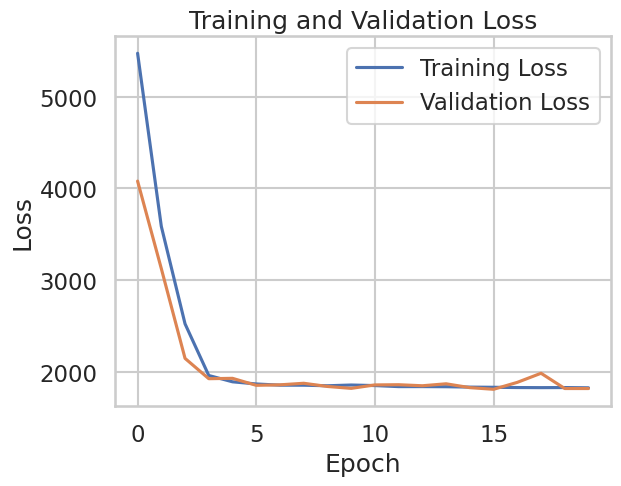

Accuracy: 0.83
Precision: 0.78


In [9]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error, accuracy_score, precision_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from math import sqrt
import matplotlib.pyplot as plt

# Load the dataset
import io
from google.colab import files

uploaded = files.upload()
file_name = list(uploaded.keys())[0]
df = pd.read_csv(io.StringIO(uploaded[file_name].decode('utf-8')))

# Define the columns to use as features and the target variable
# Adjust this list based on your dataset structure and goals
features = [
    'operational setting 1', 'operational setting 2', 'operational setting 3',
    'sensor measurement 1', 'sensor measurement 2', 'sensor measurement 3',
    'sensor measurement 4', 'sensor measurement 5',
    'sensor measurement 6', 'sensor measurement 7', 'sensor measurement 8',
    'sensor measurement 9', 'sensor measurement 10', 'sensor measurement 11',
    'sensor measurement 12', 'sensor measurement 13', 'sensor measurement 14',
    'sensor measurement 15', 'sensor measurement 16', 'sensor measurement 17',
    'sensor measurement 18', 'sensor measurement 19', 'sensor measurement 20',
    'sensor measurement 21'
]
target = 'RUL'  # Remaining Useful Life

# Separate features and target variable
X = df[features]
y = df[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the feature data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Check for zeros in the target data (y_test) and remove them if necessary
non_zero_indices = y_test != 0
X_test = X_test[non_zero_indices]
y_test = y_test[non_zero_indices]

# Build the neural network model
model = Sequential([
    Dense(64, input_shape=(X_train.shape[1],), activation='relu'),
    Dense(32, activation='relu'),
    Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model
loss, mae = model.evaluate(X_test, y_test)
print(f"Test loss (MSE): {loss}, Test MAE: {mae}")

# Make predictions
y_pred = model.predict(X_test).flatten()

# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
rmse = sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)

# Convert MAPE to percentage
mape_percentage = mape * 100

# Print evaluation metrics
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared (R2): {r2}")
print(f"Mean Absolute Percentage Error (MAPE): {mape_percentage:.2f}%")

# Plot training and validation loss over epochs
plt.figure()
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

# Precision and accuracy are binary classification metrics
# Define a threshold for classification (e.g., classifying remaining useful life as high/low)
threshold = 100  # Define an appropriate threshold for binary classification

# Convert y_test and y_pred to binary classes based on the threshold
y_test_binary = (y_test > threshold).astype(int)
y_pred_binary = (y_pred > threshold).astype(int)

# Calculate accuracy and precision
accuracy = accuracy_score(y_test_binary, y_pred_binary)
precision = precision_score(y_test_binary, y_pred_binary)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")


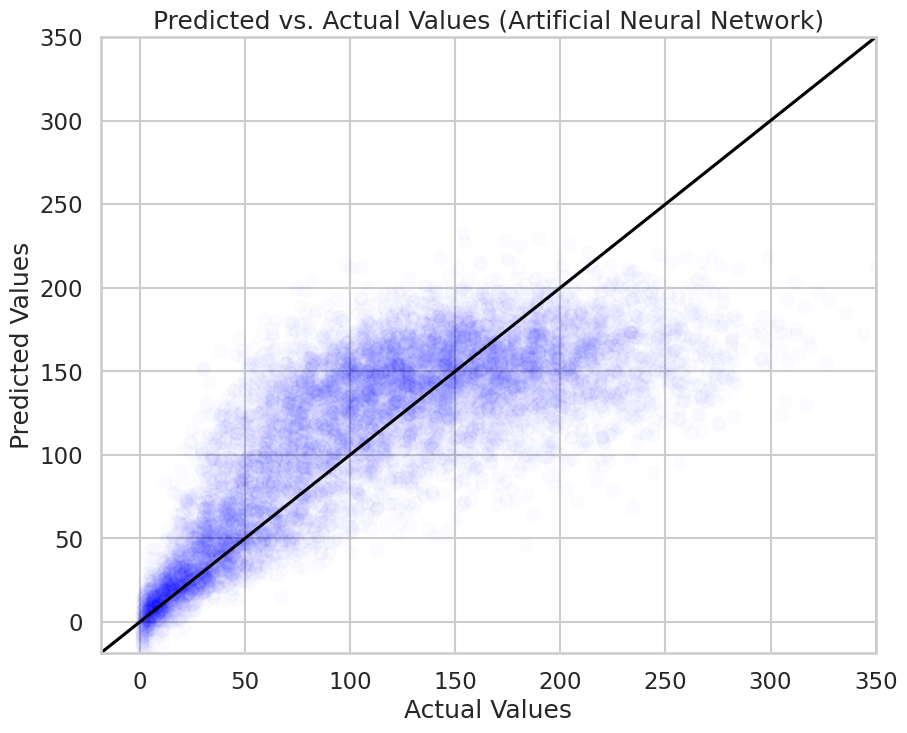

In [24]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming `y_test` contains the actual target values and `y_pred` contains the model's predicted values.

# Create a scatter plot for actual values (y_test) and predicted values (y_pred)
plt.figure(figsize=(10, 8))

# Plot predicted vs. actual values as a scatter plot
plt.scatter(y_test, y_pred, alpha=0.01, color='blue', label='Predicted vs. Actual')

# Determine the range of values for the x-axis and y-axis
min_val = min(min(y_test), min(y_pred))
max_val = max(max(y_test), max(y_pred))

# Plot a reference line (y = x) from the origin to the maximum value, representing perfect predictions
plt.plot([min_val, max_val], [min_val, max_val], color='black', label='Perfect Prediction (y = x)')

# Set x-axis and y-axis limits to be equal to ensure a square aspect ratio
plt.xlim(min_val, max_val)
plt.ylim(min_val, max_val)

# Add labels and title
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs. Actual Values (Artificial Neural Network)')



# Show the plot
plt.show()


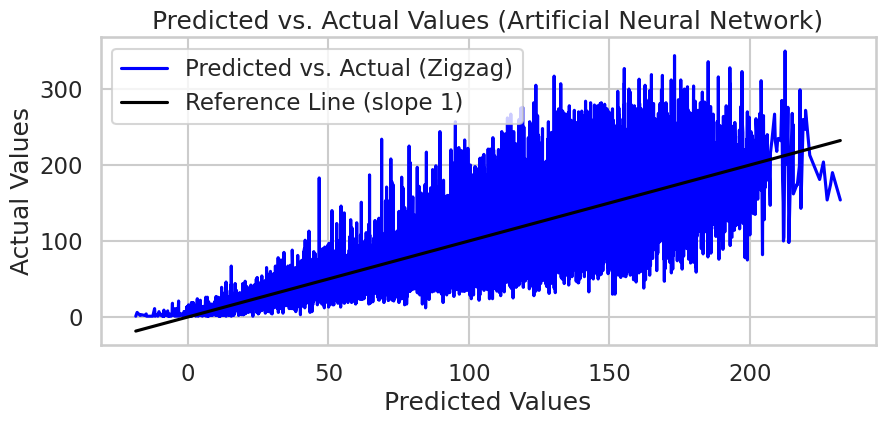

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Assuming y_test and y_pred are arrays or lists of actual and predicted values, respectively.

# Combine actual and predicted values in a DataFrame for easy sorting
data = pd.DataFrame({'actual': y_test, 'predicted': y_pred})

# Sort data based on the 'predicted' values (vertically align with a slope)
data_sorted = data.sort_values(by='predicted')

# Create a figure
plt.figure(figsize=(10, 4))

# Plot sorted actual and predicted values as a line plot (zigzag)
plt.plot(data_sorted['predicted'], data_sorted['actual'], color='blue', label='Predicted vs. Actual (Zigzag)')

# Plot a reference line with a slope of 1 (45-degree line) from origin to max value
min_val = min(data_sorted['predicted'])
max_val = max(data_sorted['predicted'])
plt.plot([min_val, max_val], [min_val, max_val], color='black', linestyle='-', label='Reference Line (slope 1)')

# Add labels, title, and legend
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Predicted vs. Actual Values (Artificial Neural Network)')
plt.legend()

# Show the plot
plt.show()


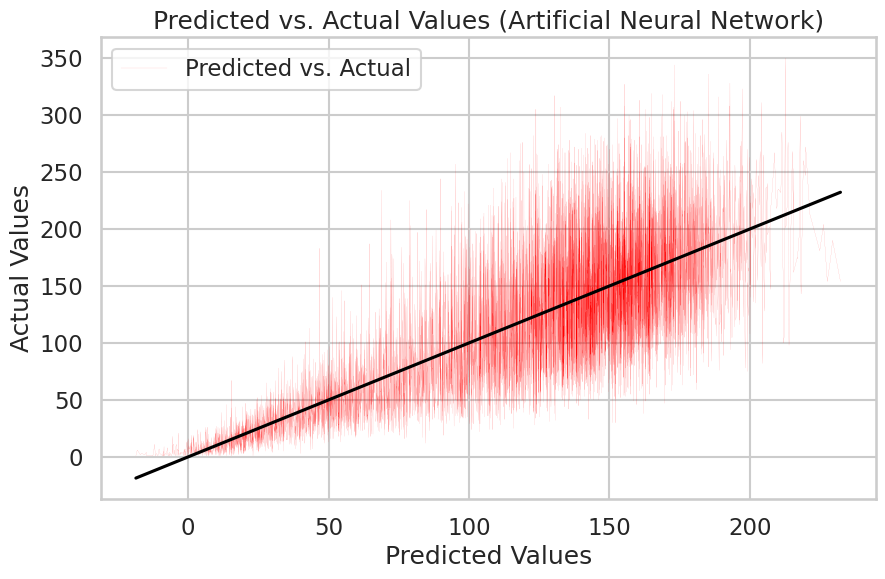

In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


data = pd.DataFrame({'actual': y_test, 'predicted': y_pred})

data_sorted = data.sort_values(by='predicted')


plt.figure(figsize=(10, 6))


plt.plot(data_sorted['predicted'], data_sorted['actual'], color='red', linewidth=0.05, label='Predicted vs. Actual')


min_val = min(data_sorted['predicted'])
max_val = max(data_sorted['predicted'])
plt.plot([min_val, max_val], [min_val, max_val], color='black', linestyle='-')

# Add labels, title, and legend
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Predicted vs. Actual Values (Artificial Neural Network)')
plt.legend()

# Show the plot
plt.show()


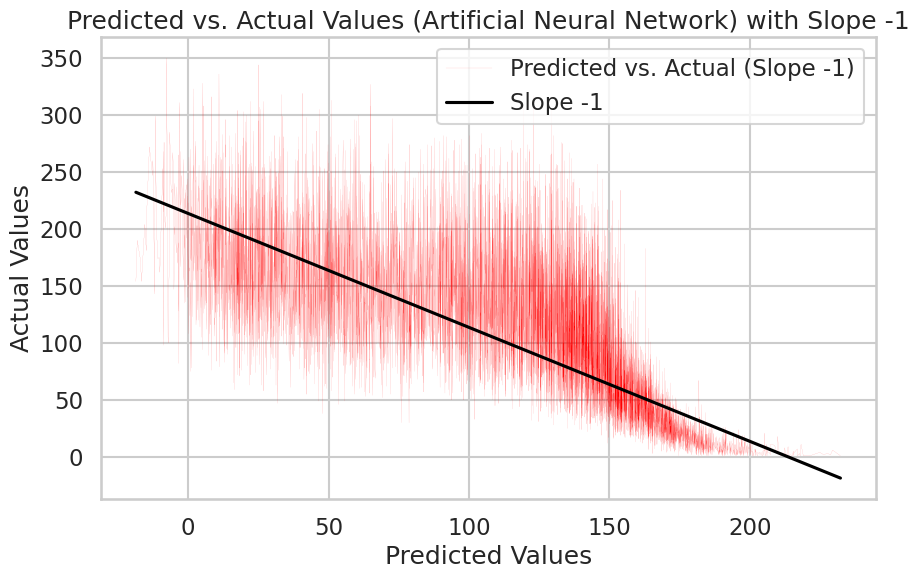

In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Assuming y_test and y_pred are arrays or lists of actual and predicted values, respectively.

# Combine actual and predicted values in a DataFrame for easy sorting
data = pd.DataFrame({'actual': y_test, 'predicted': y_pred})

# Sort data based on the 'predicted' values in ascending order
data_sorted = data.sort_values(by='predicted')

# Create a figure
plt.figure(figsize=(10, 6))


plt.plot(data_sorted['predicted'], data_sorted['actual'][::-1], color='red', linewidth=0.05, label='Predicted vs. Actual (Slope -1)')

min_val = min(data_sorted['predicted'])
max_val = max(data_sorted['predicted'])
plt.plot([max_val, min_val], [min_val, max_val], color='black', linestyle='-', label='Slope -1')


# Add labels, title, and legend
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Predicted vs. Actual Values (Artificial Neural Network) with Slope -1')
plt.legend()

# Show the plot
plt.show()
